In [75]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Audiobooks_data (1).csv to Audiobooks_data (1).csv


In [30]:
df=np.loadtxt('Audiobooks_data (1).csv',delimiter=',')

In [76]:
unscaled_inputs=df[:,1:-1]
targets_all=df[:,-1]

In [77]:
num_one_target=targets_all.sum()
zero_target_counter=0
indices_to_be_remove=[]

for i in range(targets_all.shape[0]):
    if targets_all[i] == 0:
        zero_target_counter += 1
        if zero_target_counter > num_one_target:
            indices_to_be_remove.append(i)

unscaled_inputs_equal_prior=np.delete(unscaled_inputs,indices_to_be_remove,axis=0)
unscaled_targets_equal_prior=np.delete(targets_all,indices_to_be_remove,axis=0)

In [78]:
from sklearn import preprocessing  
scaled_inputs_equal_priors=preprocessing.scale(unscaled_inputs_equal_prior)

In [79]:
shuffled_indices=np.arange(scaled_inputs_equal_priors.shape[0])
np.random.shuffle(shuffled_indices)

shuffled_inputs=scaled_inputs_equal_priors[shuffled_indices]
shuffled_targets=unscaled_targets_equal_prior[shuffled_indices]

In [80]:
sample_count=shuffled_inputs.shape[0]
train_sample_count=int(0.8*sample_count)
validation_sample_count=int(0.1*sample_count)
test_sample_count=sample_count-train_sample_count-validation_sample_count

train_input=shuffled_inputs[:train_sample_count]
train_target=shuffled_targets[:train_sample_count]

validation_inputs = shuffled_inputs[train_sample_count:train_sample_count+validation_sample_count]
validation_targets = shuffled_targets[train_sample_count:train_sample_count+validation_sample_count]

test_inputs = shuffled_inputs[train_sample_count+validation_sample_count:]
test_targets = shuffled_targets[train_sample_count+validation_sample_count:]

In [81]:
print(train_sample_count,np.sum(train_target),np.sum(train_target)/train_sample_count)
print(validation_sample_count,np.sum(validation_targets),np.sum(validation_targets)/validation_sample_count)
print(test_sample_count,np.sum(validation_targets),np.sum(validation_targets/validation_sample_count))

3579 1760.0 0.4917574741547918
447 243.0 0.5436241610738255
448 243.0 0.5436241610738254


In [82]:
np.savez('Audiobooks_data_train',inputs=train_input,targets=train_target)
np.savez('Audiobooks_data_validation',inputs=validation_inputs,targets=validation_targets)
np.savez('Audiobooks_data_test',inputs=test_inputs,targets=test_targets)

Creating Machine learning model

In [83]:
import numpy as np
import tensorflow as tf

In [84]:
npz=np.load('Audiobooks_data_train.npz')
train_input=npz['inputs']
train_target=npz['targets']

npz=np.load('Audiobooks_data_train.npz')
test_inputs=npz['inputs']
test_targets=npz['targets']

npz=np.load('Audiobooks_data_validation.npz')
validation_inputs=npz['inputs']
validation_targets=npz['targets']

In [85]:
input_size=10
output_size=2
hidden_layers=50

model=tf.keras.Sequential([tf.keras.layers.Dense(hidden_layers,activation='relu'),
                           tf.keras.layers.Dense(hidden_layers,activation='relu'),
                           tf.keras.layers.Dense(hidden_layers,activation='relu'),])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
batchsize=100
max_epochs=100

model.fit(train_input,
          train_target,
          batch_size=batchsize,
          epochs=max_epochs,
          validation_data=(validation_inputs,validation_targets),
          verbose=2)

Epoch 1/100
36/36 - 1s - loss: 2.9181 - accuracy: 0.3725 - val_loss: 0.8233 - val_accuracy: 0.6532
Epoch 2/100
36/36 - 0s - loss: 0.6656 - accuracy: 0.6284 - val_loss: 0.5953 - val_accuracy: 0.6622
Epoch 3/100
36/36 - 0s - loss: 0.5722 - accuracy: 0.6748 - val_loss: 0.5322 - val_accuracy: 0.7136
Epoch 4/100
36/36 - 0s - loss: 0.5129 - accuracy: 0.7298 - val_loss: 0.4799 - val_accuracy: 0.7606
Epoch 5/100
36/36 - 0s - loss: 0.4652 - accuracy: 0.7502 - val_loss: 0.4365 - val_accuracy: 0.7718
Epoch 6/100
36/36 - 0s - loss: 0.4302 - accuracy: 0.7670 - val_loss: 0.4038 - val_accuracy: 0.7852
Epoch 7/100
36/36 - 0s - loss: 0.4026 - accuracy: 0.7821 - val_loss: 0.3802 - val_accuracy: 0.7852
Epoch 8/100
36/36 - 0s - loss: 0.3883 - accuracy: 0.7837 - val_loss: 0.3695 - val_accuracy: 0.7964
Epoch 9/100
36/36 - 0s - loss: 0.3826 - accuracy: 0.7921 - val_loss: 0.3789 - val_accuracy: 0.7830
Epoch 10/100
36/36 - 0s - loss: 0.3705 - accuracy: 0.7997 - val_loss: 0.3564 - val_accuracy: 0.7875
Epoch 11/

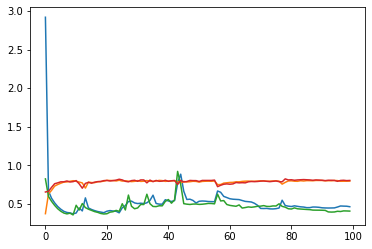

In [86]:
loss_df=pd.DataFrame(model.history.history)
import matplotlib.pyplot as plt
plt.plot(loss_df)

In [87]:
input_size=10
output_size=2
hidden_layers=50

model=tf.keras.Sequential([tf.keras.layers.Dense(hidden_layers,activation='relu'),
                           tf.keras.layers.Dense(hidden_layers,activation='relu'),
                           tf.keras.layers.Dense(hidden_layers,activation='relu'),])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
batchsize=100
max_epochs=100

early_stopping=tf.keras.callbacks.EarlyStopping()

model.fit(train_input,
          train_target,
          batch_size=batchsize,
          callbacks=[early_stopping],
          epochs=max_epochs,
          validation_data=(validation_inputs,validation_targets),
          verbose=2)

Epoch 1/100
36/36 - 1s - loss: 2.0967 - accuracy: 0.4169 - val_loss: 1.0060 - val_accuracy: 0.7383
Epoch 2/100
36/36 - 0s - loss: 0.7056 - accuracy: 0.7415 - val_loss: 0.5544 - val_accuracy: 0.7517
Epoch 3/100
36/36 - 0s - loss: 0.4820 - accuracy: 0.7569 - val_loss: 0.4165 - val_accuracy: 0.7696
Epoch 4/100
36/36 - 0s - loss: 0.4101 - accuracy: 0.7720 - val_loss: 0.3829 - val_accuracy: 0.7651
Epoch 5/100
36/36 - 0s - loss: 0.3917 - accuracy: 0.7773 - val_loss: 0.3841 - val_accuracy: 0.8076


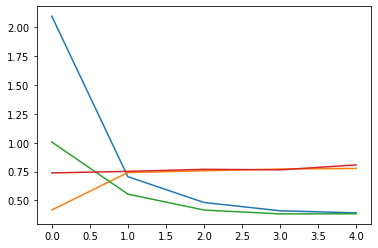

In [88]:
loss_df=pd.DataFrame(model.history.history)
import matplotlib.pyplot as plt
plt.plot(loss_df)

In [89]:
input_size=10
output_size=2
hidden_layers=50

model=tf.keras.Sequential([tf.keras.layers.Dense(hidden_layers,activation='relu'),
                           tf.keras.layers.Dense(hidden_layers,activation='relu'),
                           tf.keras.layers.Dense(hidden_layers,activation='relu'),])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
batchsize=100
max_epochs=100

early_stopping=tf.keras.callbacks.EarlyStopping(patience=25)

model.fit(train_input,
          train_target,
          batch_size=batchsize,
          callbacks=[early_stopping],
          epochs=max_epochs,
          validation_data=(validation_inputs,validation_targets),
          verbose=2)

Epoch 1/100
36/36 - 1s - loss: 3.3896 - accuracy: 0.3926 - val_loss: 0.7981 - val_accuracy: 0.6801
Epoch 2/100
36/36 - 0s - loss: 0.6590 - accuracy: 0.6823 - val_loss: 0.6051 - val_accuracy: 0.7181
Epoch 3/100
36/36 - 0s - loss: 0.5660 - accuracy: 0.7234 - val_loss: 0.5217 - val_accuracy: 0.7651
Epoch 4/100
36/36 - 0s - loss: 0.4831 - accuracy: 0.7382 - val_loss: 0.4506 - val_accuracy: 0.7785
Epoch 5/100
36/36 - 0s - loss: 0.4376 - accuracy: 0.7597 - val_loss: 0.4415 - val_accuracy: 0.7897
Epoch 6/100
36/36 - 0s - loss: 0.4161 - accuracy: 0.7728 - val_loss: 0.4483 - val_accuracy: 0.7785
Epoch 7/100
36/36 - 0s - loss: 0.4025 - accuracy: 0.7773 - val_loss: 0.4237 - val_accuracy: 0.8054
Epoch 8/100
36/36 - 0s - loss: 0.3948 - accuracy: 0.7835 - val_loss: 0.3814 - val_accuracy: 0.8076
Epoch 9/100
36/36 - 0s - loss: 0.4179 - accuracy: 0.7835 - val_loss: 0.4294 - val_accuracy: 0.8031
Epoch 10/100
36/36 - 0s - loss: 0.4267 - accuracy: 0.7840 - val_loss: 0.4249 - val_accuracy: 0.7987
Epoch 11/

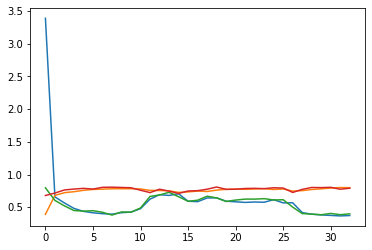

In [90]:
loss_df=pd.DataFrame(model.history.history)
import matplotlib.pyplot as plt
plt.plot(loss_df)

In [92]:
test_loss,test_accuracy=model.evaluate(test_inputs,test_targets)
print(test_loss,test_accuracy)

112/112 [==============================] - 0s 843us/step - loss: 0.3607 - accuracy: 0.8041
0.360698938369751 0.804135262966156
